In [1]:
from ipywidgets import interact # Package ipywidgets contains the features of interactive notebooks.
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as pl  # Matplotlib is a scientific plotting package.
from mpl_toolkits.basemap import Basemap # Import the map plotting interface.

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%pylab inline
pl.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
pl.rcParams.update({'figure.figsize': [13,6]}) # Set the standard figure size.

m = Basemap(llcrnrlon=-150, llcrnrlat=20,
            urcrnrlon=  50, urcrnrlat=70,
            projection='mill', resolution='l')

Populating the interactive namespace from numpy and matplotlib


In [2]:
nc_file = nc.Dataset("../data/test.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]
p = nc_file.variables["level"][:]*100
t = 5
p_plot = 50000.
n = abs(p-p_plot).argmin()
nroll = lon.size//2
lon = np.roll(lon, nroll)
lon = np.where(lon>=180., lon-360., lon)

u = np.roll(nc_file.variables["u"][t,:,:,:], nroll, -1)
v = np.roll(nc_file.variables["v"][t,:,:,:], nroll, -1)
z = np.roll(nc_file.variables["z"][t,:,:,:], nroll, -1)
T = np.roll(nc_file.variables["t"][t,:,:,:], nroll, -1)
U = (u**2 + v**2)**.5

lons, lats = m(*np.meshgrid(lon, lat))
lonrad, latrad = np.meshgrid(np.pi/180.*lon, np.pi/180.*lat)

/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


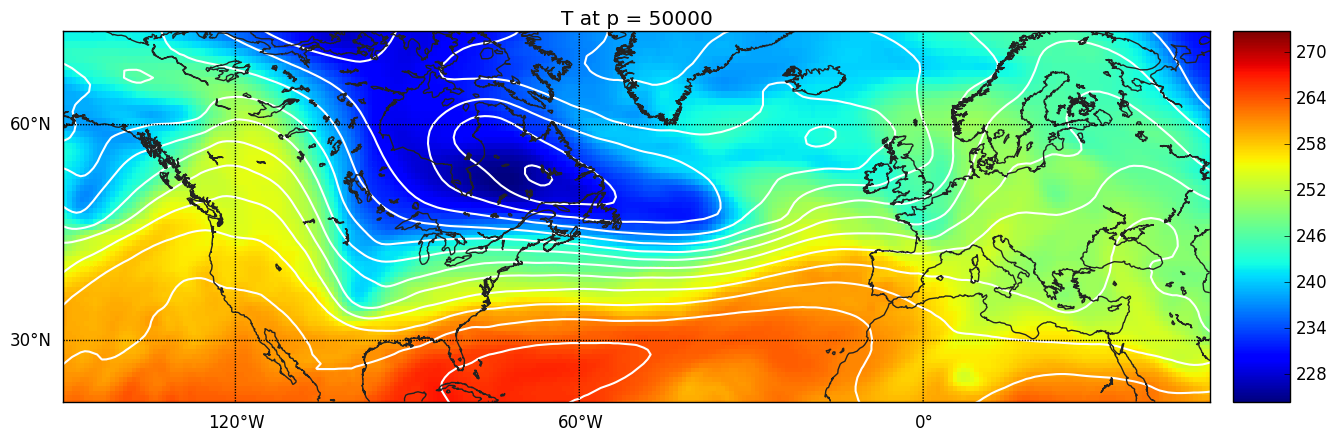

In [3]:
m.pcolormesh(lons, lats, T[n,:,:], cmap=pl.cm.jet)
m.colorbar()
m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
m.drawcoastlines(color='#222222')
# draw parallels.
parallels = np.arange(0.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1])
pl.title('T at p = {0}'.format(p[n]));
pl.tight_layout()

In [4]:
r_earth = 6.37e6

dzdx = np.zeros(z.shape)
dzdy = np.zeros(z.shape)

cos_lat = np.cos(latrad)
for k in range(p.size):
    for j in range(lat.size):
        dzdx[k,j,:] = 1./(r_earth*cos_lat[j,:]) * np.gradient(z[k,j,:]) / np.gradient(lonrad[j,:])

for k in range(p.size):
    for i in range(lon.size):
        dzdy[k,:,i] = (1./r_earth) * np.gradient(z[k,:,i]) / np.gradient(latrad[:,i])

omega = 7.2921e-5
f = 2.*omega*np.sin(latrad)
ug = -1./f*dzdy
vg =  1./f*dzdx
Ug = (ug**2 + vg**2)**.5

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in multiply


/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


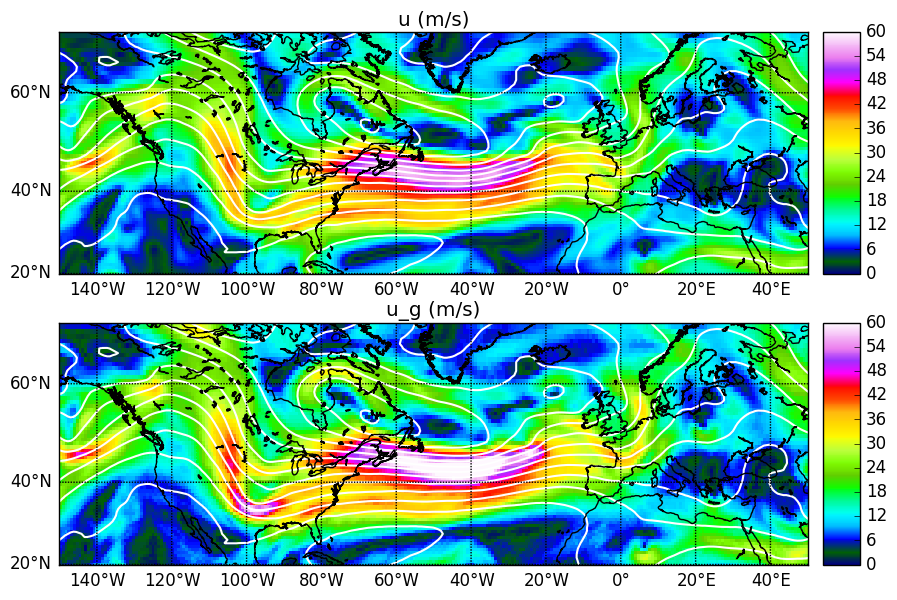

In [5]:
umin = 0.
umax = 60.
pl.subplot(211)
m.pcolormesh(lons, lats, U[n,:,:], vmin=umin, vmax=umax, cmap=pl.cm.gist_ncar)
m.colorbar()
m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('u (m/s)')
pl.subplot(212)
m.pcolormesh(lons, lats, Ug[n,:,:], vmin=umin, vmax=umax, cmap=pl.cm.gist_ncar)
m.colorbar();
m.contour(lons, lats, z[n,:,:], 15, colors='w', linewidths=1.5)
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('u_g (m/s)')
pl.tight_layout()

In [6]:
dTdx = np.zeros(T.shape)
dTdy = np.zeros(T.shape)

cos_lat = np.cos(latrad)
for k in range(p.size):
    for j in range(lat.size):
        dTdx[k,j,:] = 1./(r_earth*cos_lat[j,:]) * np.gradient(T[k,j,:]) / np.gradient(lonrad[j,:])

for k in range(p.size):
    for i in range(lon.size):
        dTdy[k,:,i] = (1./r_earth) * np.gradient(T[k,:,i]) / np.gradient(latrad[:,i])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


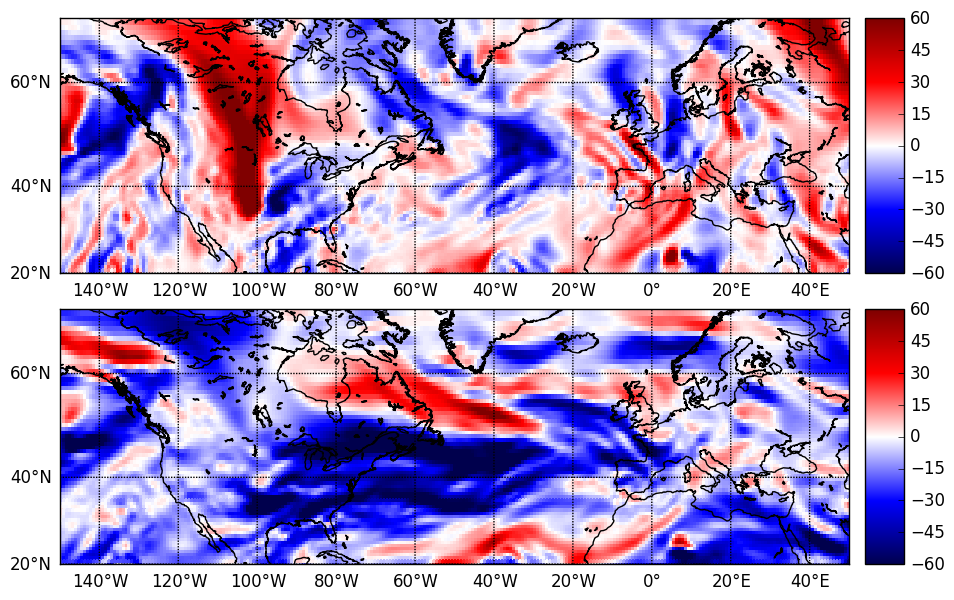

In [7]:
R = 287.
minmax=60.
pl.subplot(211)
m.pcolormesh(lons, lats, -R/f*dTdx[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar()
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);

pl.subplot(212)
m.pcolormesh(lons, lats,  R/f*dTdy[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar();
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.tight_layout()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


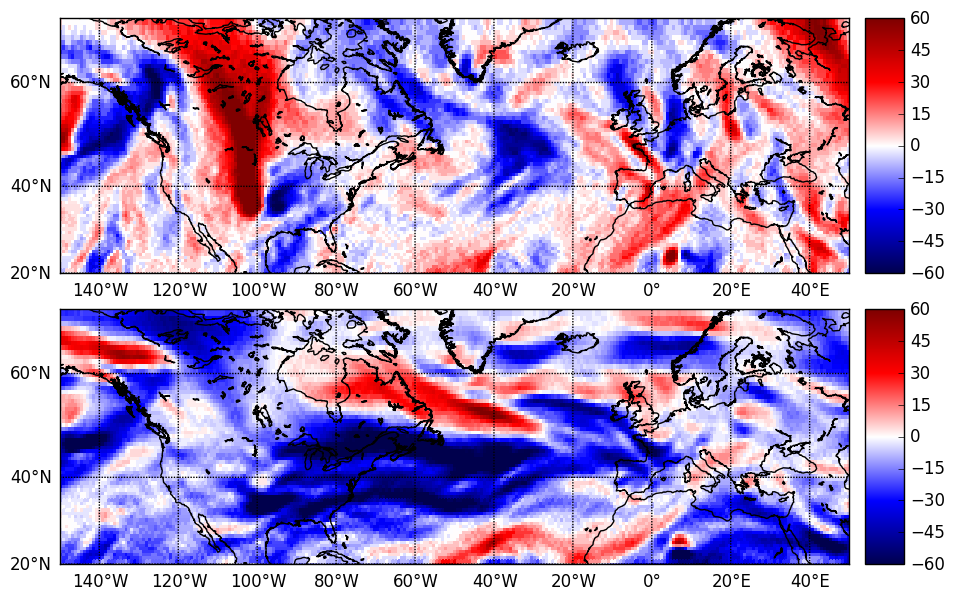

In [8]:
dvgdlnp = (vg[n+1]-vg[n-1])/(np.log(p[n+1])-np.log(p[n-1]))
dugdlnp = (ug[n+1]-ug[n-1])/(np.log(p[n+1])-np.log(p[n-1]))

pl.subplot(211)
m.pcolormesh(lons, lats, dvgdlnp, vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar()
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.subplot(212)
m.pcolormesh(lons, lats, dugdlnp, vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar()
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.tight_layout()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


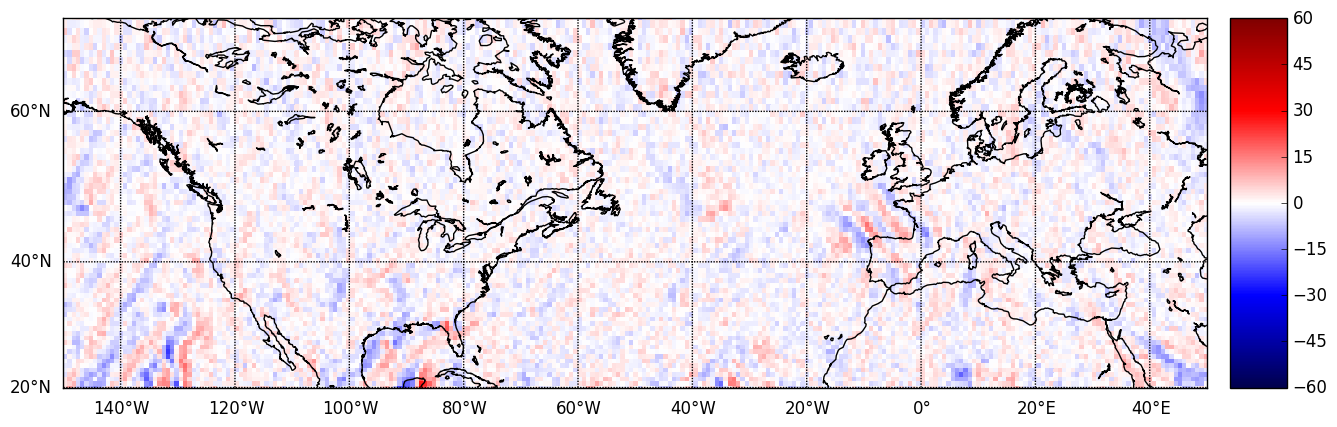

In [9]:
m.pcolormesh(lons, lats, dvgdlnp+R/f*dTdx[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.seismic)
m.colorbar();
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.tight_layout()

/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


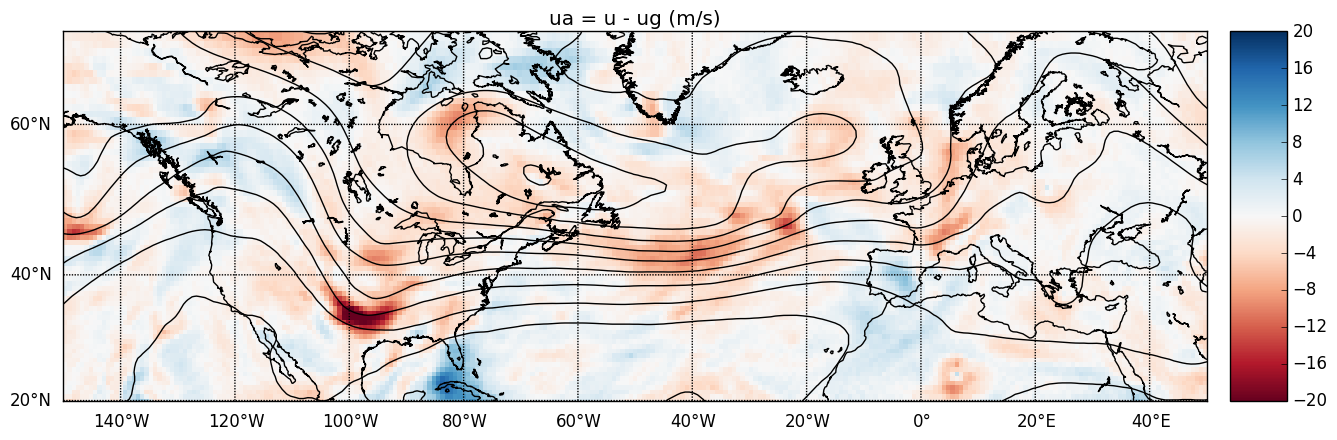

In [10]:
minmax=20.
m.pcolormesh(lons, lats, U[n,:,:]-Ug[n,:,:], vmin=-minmax, vmax=minmax, cmap=pl.cm.RdBu)
m.colorbar();
m.contour(lons, lats, z[n,:,:], 12, colors='k')
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('ua = u - ug (m/s)')
pl.tight_layout()

In [11]:
div = np.zeros(lons.shape)
for j in range(lat.size):
    div[j,:]  = 1./(r_earth*cos_lat[j,:]) * np.gradient(ug[n,j,:]) / np.gradient(lonrad[j,:])
for i in range(lon.size):
    div[:,i] += (1./r_earth) * np.gradient(vg[n,:,i]) / np.gradient(latrad[:,i])

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:1463: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (y[slice2] - y[slice3])/2.0


/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


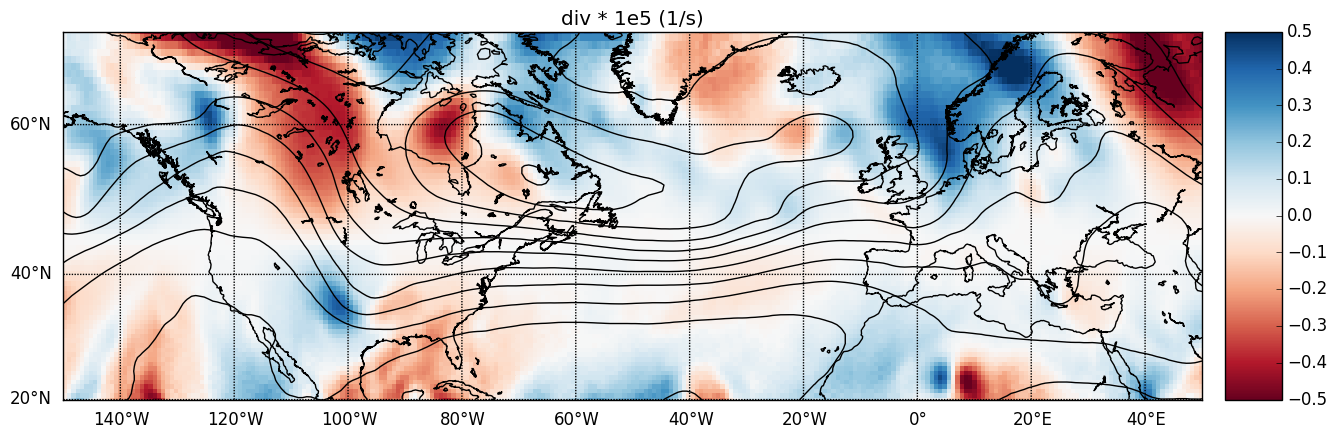

In [12]:
minmax = 0.5
m.pcolormesh(lons, lats, 1e5*div, cmap=pl.cm.RdBu, vmin=-minmax, vmax=minmax)
m.colorbar();
m.contour(lons, lats, z[n,:,:], 12, colors='k')
m.drawcoastlines()
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('div * 1e5 (1/s)')
pl.tight_layout()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


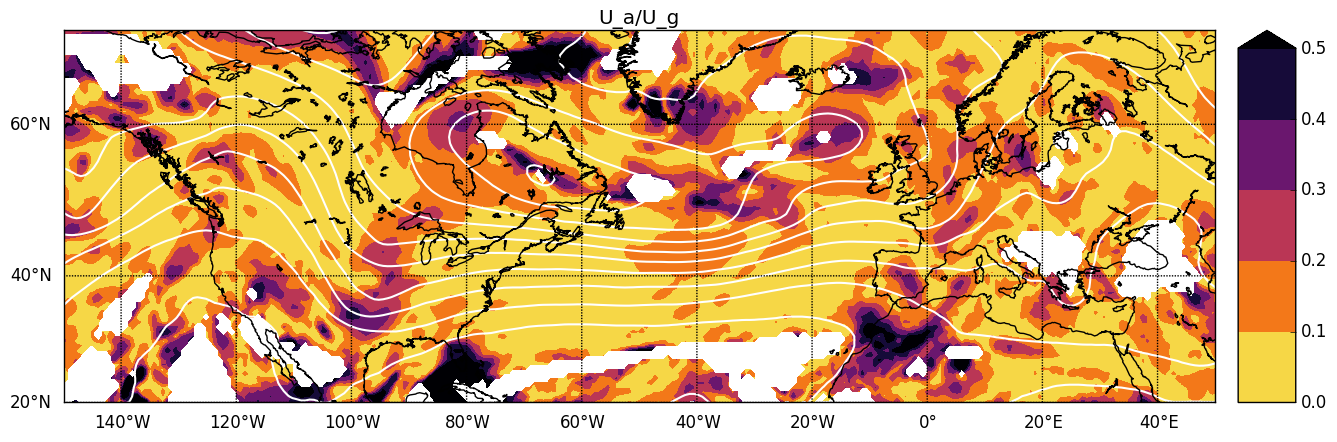

In [13]:
Ug_masked = np.ma.masked_array(Ug, abs(Ug)<5.)
error_range = np.linspace(0., 0.5, 6)
m.contourf(lons, lats, abs( (U[n,:,:]-Ug_masked[n,:,:])/Ug_masked[n,:,:] ), error_range, extend='max', cmap=pl.cm.inferno_r)
m.colorbar();
m.contour(lons, lats, z[n,:,:], 12, colors='w', linewidths=1.5)
m.drawcoastlines(color='k')
# draw parallels.
parallels = np.arange(0.,90,20.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,20.)
m.drawmeridians(meridians,labels=[0,0,0,1]);
pl.title('U_a/U_g')
pl.tight_layout()